In [74]:
#Importing Libraries

In [75]:
import numpy as np 
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.layers import GlobalMaxPooling2D 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from numpy.linalg import norm
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import display, Image


In [76]:
#Extract Filenames from Folder


In [77]:
filenames = []

for file in os.listdir("images"):
    filenames.append(os.path.join('images',file))
   

In [78]:
len(filenames)

600

In [79]:
#Importing Resnet50 Model and Configuration

In [80]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model.trainable = False

model = tf.keras.Sequential([model,GlobalMaxPooling2D()
    
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [81]:
#Extracting Features from Image

In [82]:
img = image.load_img('birugelap1.jpeg', target_size=(224, 224))
img_array =image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result / norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.01653978, 0.04865215, 0.00411076, ..., 0.02390272, 0.01794425,
       0.04358589], dtype=float32)

In [83]:
result

array([ 5.339731 , 15.7069435,  1.3271238, ...,  7.716796 ,  5.793151 ,
       14.0713415], dtype=float32)

In [84]:
#Define Function to Extract Features from Images

In [85]:
def extract_features_from_images(image_path, model):
 img = image.load_img(image_path, target_size=(224,224))
 img_array =image.img_to_array(img)
 img_expand_dim = np.expand_dims(img_array, axis=0)
 img_preprocess = preprocess_input(img_expand_dim)
 result = model.predict(img_preprocess).flatten()
 norm_result = result / norm(result)
 return norm_result

In [86]:
# Testing feature extraction for one image
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([0.01653978, 0.04865215, 0.00411076, ..., 0.02390272, 0.01794425,
       0.04358589], dtype=float32)

In [87]:
# Step 4: Extract Features for All Images

In [88]:
image_features = []
for file in filenames  : 
    image_features.append(extract_features_from_images(file, model))   
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

[array([0.01653978, 0.04865215, 0.00411076, ..., 0.02390272, 0.01794425,
        0.04358589], dtype=float32),
 array([0.0128401 , 0.03378705, 0.0042681 , ..., 0.00785082, 0.0259502 ,
        0.02562119], dtype=float32),
 array([0.00620607, 0.02815365, 0.0040655 , ..., 0.01513109, 0.02004083,
        0.01942434], dtype=float32),
 array([0.00554069, 0.02985679, 0.        , ..., 0.00814879, 0.0160619 ,
        0.00326558], dtype=float32),
 array([0.01932715, 0.03039646, 0.00312045, ..., 0.00533503, 0.01319195,
        0.02373297], dtype=float32),
 array([0.01072168, 0.04210748, 0.0035909 , ..., 0.00926819, 0.02147875,
        0.02435251], dtype=float32),
 array([0.00594694, 0.02663965, 0.00855095, ..., 0.00470737, 0.00695915,
        0.03378434], dtype=float32),
 array([0.01171957, 0.07108072, 0.        , ..., 0.00651409, 0.01118174,
        0.02511723], dtype=float32),
 array([0.02455477, 0.0411128 , 0.00846249, ..., 0.00569215, 0.01697502,
        0.05622944], dtype=float32),
 array([0.

In [89]:
Image_features = pkl.dump(image_features, open('Image_features.pkl', 'wb'))

In [90]:
filenames = pkl.dump(filenames, open('filenames.pkl', 'wb'))

In [91]:
#Loading Pickle Files

In [92]:
Image_features = pkl.load(open('Image_features.pkl', 'rb'))

In [93]:
filenames = pkl.load(open('filenames.pkl', 'rb'))

In [94]:
np.array(Image_features).shape

(600, 2048)

In [95]:
# Normalize features
Image_features_normalized = normalize(Image_features, axis=1)

In [96]:
# Function to extract augmented and robust features
def extract_fine_tuned_features(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)

    # Augmentation for robust feature extraction
    augmented_features = []
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    for batch in datagen.flow(img_preprocess, batch_size=1):
        feature = model.predict(batch)
        augmented_features.append(feature.flatten())
        if len(augmented_features) >= 5:  # Limit number of augmentations
            break
    return np.mean(augmented_features, axis=0)  # Averaging features for stability

In [97]:
# Set Up NearestNeighbors for Finding Similar Images

In [98]:
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')

In [99]:
neighbors.fit(Image_features_normalized)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [100]:
# Upload test images and get recommendations
def recommend_images(uploaded_image_path):
    # Extract features from the uploaded image
    input_img_features = extract_fine_tuned_features(uploaded_image_path, model)
    input_img_features = np.expand_dims(input_img_features, axis=0)  # Ensure correct shape
    
     # Find the nearest neighbors
    distances, indices = neighbors.kneighbors(input_img_features)

    print("Uploaded Image:")
    display(image.load_img(uploaded_image_path, target_size=(224, 224)))

    print("\nRecommended Images with Similarity Scores:")
    for idx in indices[0]:
        recommended_img_path = filenames[idx]
        similarity = 1 / (1 + distances[0][idx]) * 100  # Convert to percentage
        print(f"Recommended Image: {recommended_img_path}, Similarity: {similarity:.2f}%")
        display(image.load_img(recommended_img_path, target_size=(224, 224)))

In [101]:
#Define Ground Truth Data and Save to JSON File

In [102]:
ground_truth_dict = {
    "cream1.jpeg": ["images\\lightpink18.jpg", "images\\putih15.jpeg", "images\\cream14.jpeg", "images\\kuningcair14.jpg", "images\\grey14.jpeg"],
    "birugelap1.jpeg": ["images\\birugelap8.jpeg","images\\hijau6.jpg","images\\hitam8.jpeg","images\\grey12.jpg", "images\\kebayahijau4.jpg"],
    "grey1.jpg": ["images\\lightpink4.jpg","images\\lilac13.jpg","images\\lightpink2.jpg","images\\grey3.jpeg","images\\grey6.jpg"],
    "hijau1.jpg": ["images\\merah6.jpg","images\\birugelap5.jpg","images\\kebayahijau4.jpg","images\\hijau6.jpg","images\\hijau8.jpg"],
    "hitam1.jpg": ["images\\hitam7.jpg","images\\hitam6.jpg","images\\birugelap19.jpg","images\\merah20.jpg","images\\hijau3.jpg"],
    "kuningcair1.jpeg": ["images\\kebayaputih9.jpeg","images\\kuningcair6.jpeg", "images\\putih13.jpeg","images\\putih3.jpg","images\\grey19.jpeg"],
    "lilac1.jpg": ["images\\birugelap7.jpg","images\\lilac7.jpg","images\\birugelap11.jpg","images\\grey17.jpg","images\\hijau17.jpg"],
    "lightpink1.jpg": ["images\\lightpink8.jpg","images\\lightpink2.jpg","images\\lightpink4.jpg","images\\putih13.jpeg","images\\lightpink18.jpg"],
    "merah1.jpeg": ["images\\merah10.jpg","images\\hitam8.jpeg","images\\merah3.jpeg", "images\\merah2.jpeg","images\\lilac11.jpg"],
    "putih1.jpg": ["images\\grey16.jpg","images\\putih13.jpeg","images\\tudungputih6.jpeg","images\\kuningcair3.jpeg","images\\putih17.jpeg"],
    
    "kebayacream1.jpg": ["images\\kebayacream17.jpg","images\\kebayalilac15.jpg","images\\kebayacream18.jpg","images\\kebayabirugelap16.jpg","images\\kebayagrey12.jpg"],
    "kebayabirugelap1.jpeg": ["images\\kebayagrey6.jpg","images\\birugelap13.jpg","images\\kebayabirugelap18.jpg","images\\kebayabirugelap13.jpeg","images\\kebayabirugelap13.jpeg"],
    "kebayagrey1.jpg": ["images\\putih11.jpg","images\\grey9.jpg","images\\grey19.jpeg","images\\lightpink2.jpg","images\\putih13.jpeg"],
    "kebayahijau1.jpeg": ["images\\kebayamerah4.jpg","images\\kebayahitam1.jpg","images\\kebayahijau18.jpg","images\\kebayalilac2.jpg","images\\kebayabirugelap12.jpeg"],
    "kebayahitam1.jpg": ["images\\kebayabirugelap12.jpeg","images\\kebayahijau1.jpeg","images\\kebayamerah8.jpeg","images\\kebayahitam16.jpeg","images\\kebayamerah16.jpg"],
    "kebayakuning1.jpg": ["images\\kebayakuning7.jpg","images\\kebayamerah10.jpg","images\\kebayamerah10.jpg","images\\kebayabirugelap7.jpg","images\\kebayalightpink10.jpg"],
    "kebayalilac1.jpg": ["images\\kebayalilac4.jpg","images\\kebayagrey1.jpg","images\\putih13.jpeg","images\\kebayalilac12.jpg","images\\grey19.jpeg"],
    "kebayalightpink1.jpg": ["images\\kebayalilac19.jpeg","images\\kebayacream7.jpg","images\\kebayalightpink15.jpg","images\\kebayamerah18.jpg","images\\kebayakuning10.jpg"],
    "kebayamerah1.jpg": ["images\\kebayahijau4.jpg","images\\merah6.jpg","images\\merah2.jpeg","images\\merah14.jpg","images\\kebayamerah4.jpg"],
    "kebayaputih1.jpeg": ["images\\kebayagrey4.jpg","images\\kebayagrey15.jpg","images\\kebayaputih16.jpeg","images\\putih11.jpg","images\\kebayalightpink12.jpg"],
    
    "tudungcream1.jpg": ["images\\tudungcream5.jpeg","images\\tudungkuning9.jpeg","images\\tudunggrey16.jpg","images\\tudungkuning12.jpg","images\\tudungpink6.jpg"],
    "tudungbirugelap1.jpeg": ["images\\tudungbirugelap4.jpg","images\\tudungbirugelap9.jpg","images\\tudunghijau9.jpg","images\\tudunghitam19.jpeg","images\\tudunghitam3.jpeg"],
    "tudunggrey1.jpg": ["images\\tudunggrey11.jpg","images\\tudunggrey5.jpg","images\\tudungputih16.jpeg","images\\tudunggrey7.jpg","images\\tudunglilac11.jpg"],
    "tudunghijau1.jpeg": ["images\\tudunghijau9.jpg","images\\tudunghijau2.jpeg","images\\tudunghijau8.jpeg","images\\tudungmerah2.jpeg","images\\tudungbirugelap5.jpeg"],
    "tudunghitam1.jpeg": ["images\\tudunghitam15.jpg","images\\tudungbirugelap5.jpeg","images\\tudunghitam12.jpg","images\\tudungbirugelap7.jpg","images\\tudunghitam17.jpg"],
    "tudungkuning1.jpeg": ["images\\tudungkuning17.jpeg","images\\tudungmerah12.jpg","images\\tudungkuning18.jpeg","images\\tudungkuning13.jpeg","images\\tudungkuning8.jpg"],
    "tudunglilac1.jpg": ["images\\tudunglilac19.jpeg","images\\tudungpink7.jpg","images\\tudunglilac3.jpg","images\\tudunglilac13.jpg","images\\tudungpink5.jpg"],
    "tudungpink1.jpeg": ["images\\tudungpink6.jpg","images\\tudungkuning8.jpg","images\\tudungpink5.jpg","images\\tudungcream7.jpg","images\\tudunggrey16.jpg"],
    "tudungmerah1.jpeg": ["images\\tudungmerah13.jpg","images\\tudungmerah7.jpeg","images\\tudungmerah18.jpg","images\\tudungmerah2.jpeg","images\\tudungmerah10.jpg"],
    "tudungputih1.jpg": ["images\\tudungputih7.jpeg","images\\tudungputih3.jpeg","images\\tudungputih17.jpeg","images\\tudungpink13.jpg","images\\tudungputih8.jpeg"]
}

              



In [103]:
#Save ground truth to JSON

In [104]:
with open('ground_truth.json', 'w') as file:
    json.dump(ground_truth_dict, file)
print("Ground truth data saved to 'ground_truth.json'")

Ground truth data saved to 'ground_truth.json'


In [105]:
#Define Function to Recommend Images

In [106]:
def recommend_images(uploaded_image_path, model, neighbors, filenames):
    input_img_features = extract_features_from_images(uploaded_image_path, model)
    input_img_features = np.expand_dims(input_img_features, axis=0)
    distances, indices = neighbors.kneighbors(input_img_features)
    
    print("Uploaded Image:")
    display(Image(filename=uploaded_image_path))
    
    print("\nRecommended Images with Similarity Scores:")
    for idx in indices[0]:
        recommended_img_path = filenames[idx]
        similarity = 1 / (1 + distances[0][idx]) * 100
        print(f"Recommended Image: {recommended_img_path}, Similarity: {similarity:.2f}%")
        display(Image(filename=recommended_img_path))

In [107]:
#Evaluate Recommendations by Category and Overall Accuracy

In [108]:
categories = {
    "baju kurung": ["cream1.jpeg", "birugelap1.jpeg", "grey1.jpg", "hijau1.jpg", "hitam1.jpg","kuningcair1.jpeg","lilac1.jpg","lightpink1.jpg","merah1.jpeg","putih1.jpg"],
    "baju kebaya": ["kebayacream1.jpg", "kebayahitam1.jpg","kebayabirugelap1.jpeg","kebayagrey1.jpg","kebayahijau1.jpeg","kebayakuning1.jpg","kebayalilac1.jpg","kebayalightpink1.jpg","kebayamerah1.jpg","kebayaputih1.jpeg"],
    "tudung": ["tudungcream1.jpg", "tudungputih1.jpg","tudungbirugelap1.jpeg","tudunggrey1.jpg","tudunghijau1.jpeg","tudunghitam1.jpeg","tudungkuning1.jpeg","tudunglilac1.jpg","tudungpink1.jpeg","tudungmerah1.jpeg"]
}


In [109]:
# Step 8: Define Function to Evaluate Top-5 Accuracy for Each Category
def evaluate_top_5_accuracy_by_category(categories, ground_truth_dict, neighbors, filenames, model, n=5):
    category_top_5_accuracies = defaultdict(float)
    total_hits = 0
    total_relevant = 0

    for category, queries in categories.items():
        category_hits = 0
        category_relevant = 0

        # Evaluate top-5 accuracy for each image in the category
        for query_id in queries:
            if query_id in ground_truth_dict:
                relevant_ids = ground_truth_dict[query_id]
                input_features = extract_features_from_images(query_id, model)
                distances, indices = neighbors.kneighbors([input_features])
                top_n_recommendations = [filenames[idx].split('/')[-1] for idx in indices[0][:n]]
                hits = sum(1 for img_id in top_n_recommendations if img_id in relevant_ids)

                category_hits += hits
                category_relevant += len(relevant_ids)

        category_accuracy = (category_hits / category_relevant) * 100 if category_relevant else 0
        category_top_5_accuracies[category] = category_accuracy

    return category_top_5_accuracies

In [110]:
# Function to evaluate top-5 accuracy by category
def evaluate_top_5_accuracy_by_category(categories, ground_truth_dict, neighbors, filenames, model, n=5):
    category_top_5_accuracies = defaultdict(float)  # Dictionary to store the accuracy for each category
    total_hits = 0  # Counter for overall hits across all categories
    total_relevant = 0  # Counter for overall relevant items across all categories

    # Loop through each category in the categories dictionary
    for category, queries in categories.items():
        category_hits = 0  # Counter for hits in the current category
        category_relevant = 0  # Counter for relevant ground truth items in the current category

        # Evaluate top-5 accuracy for each image in the category
        for query_id in queries:
            if query_id in ground_truth_dict:  # Check if the query exists in the ground truth
                relevant_ids = ground_truth_dict[query_id]  # Relevant ground truth images for this query
                input_features = extract_features_from_images(query_id, model)  # Extract features for the query image
                distances, indices = neighbors.kneighbors([input_features])  # Find the nearest neighbors
                top_n_recommendations = [filenames[idx].split('/')[-1] for idx in indices[0][:n]]  # Top-5 recommended images
                
                # Count how many of the top-5 recommendations match relevant ground truth images
                hits = sum(1 for img_id in top_n_recommendations if img_id in relevant_ids)

                category_hits += hits  # Add to category hits
                category_relevant += len(relevant_ids)  # Add to total relevant images for the category

        # Calculate the category accuracy as a percentage
        category_accuracy = (category_hits / category_relevant) * 100 if category_relevant else 0
        category_top_5_accuracies[category] = category_accuracy  # Store the category accuracy

        # Update the total hits and relevant counts for overall accuracy
        total_hits += category_hits
        total_relevant += category_relevant

    # Calculate overall accuracy (across all categories)
    overall_accuracy = (total_hits / total_relevant) * 100 if total_relevant else 0

    return category_top_5_accuracies, overall_accuracy

category_top_5_accuracies, overall_accuracy = evaluate_top_5_accuracy_by_category(
    categories, ground_truth_dict, neighbors, filenames, model, n=5
)

print("Top-5 Accuracy by Category:", category_top_5_accuracies)
print("Overall Accuracy:", overall_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

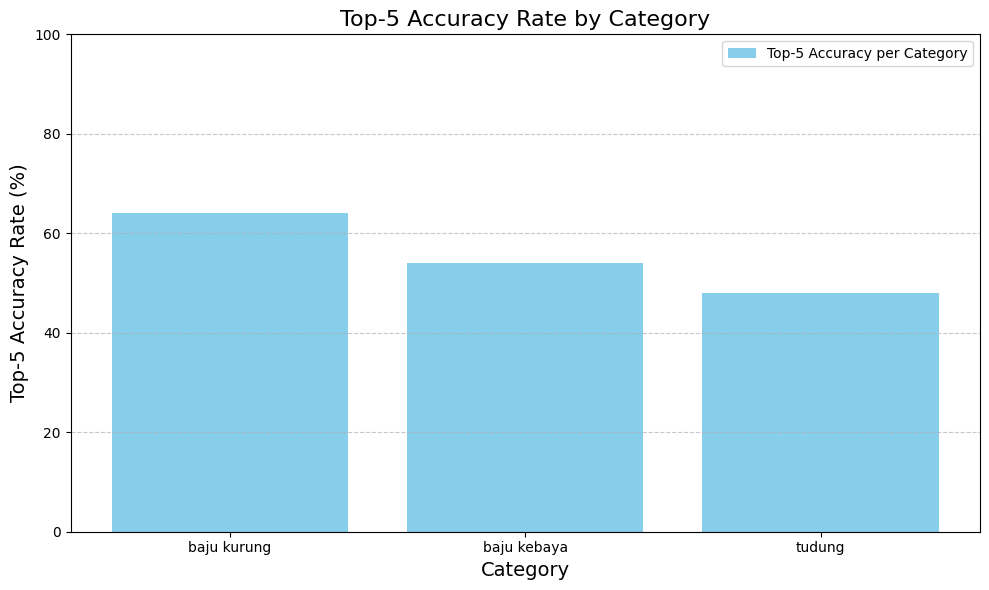

In [111]:
def plot_top_5_accuracy(category_top_5_accuracies):
    categories = list(category_top_5_accuracies.keys())
    accuracies = list(category_top_5_accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, accuracies, color='skyblue', label='Top-5 Accuracy per Category')
    plt.title("Top-5 Accuracy Rate by Category", fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel("Top-5 Accuracy Rate (%)", fontsize=14)
    plt.ylim(0, 100)
    plt.legend(loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot the results as a bar graph
plot_top_5_accuracy(category_top_5_accuracies)
    


In [112]:
# Step 8: Load Ground Truth Data for Evaluation 

In [113]:
with open('ground_truth.json', 'r') as file:
    ground_truth_dict = json.load(file)
print("Loaded ground truth data:", ground_truth_dict)

Loaded ground truth data: {'cream1.jpeg': ['images\\lightpink18.jpg', 'images\\putih15.jpeg', 'images\\cream14.jpeg', 'images\\kuningcair14.jpg', 'images\\grey14.jpeg'], 'birugelap1.jpeg': ['images\\birugelap8.jpeg', 'images\\hijau6.jpg', 'images\\hitam8.jpeg', 'images\\grey12.jpg', 'images\\kebayahijau4.jpg'], 'grey1.jpg': ['images\\lightpink4.jpg', 'images\\lilac13.jpg', 'images\\lightpink2.jpg', 'images\\grey3.jpeg', 'images\\grey6.jpg'], 'hijau1.jpg': ['images\\merah6.jpg', 'images\\birugelap5.jpg', 'images\\kebayahijau4.jpg', 'images\\hijau6.jpg', 'images\\hijau8.jpg'], 'hitam1.jpg': ['images\\hitam7.jpg', 'images\\hitam6.jpg', 'images\\birugelap19.jpg', 'images\\merah20.jpg', 'images\\hijau3.jpg'], 'kuningcair1.jpeg': ['images\\kebayaputih9.jpeg', 'images\\kuningcair6.jpeg', 'images\\putih13.jpeg', 'images\\putih3.jpg', 'images\\grey19.jpeg'], 'lilac1.jpg': ['images\\birugelap7.jpg', 'images\\lilac7.jpg', 'images\\birugelap11.jpg', 'images\\grey17.jpg', 'images\\hijau17.jpg'], 'l

In [114]:
#Define Evaluation Function to Compare Results with Ground Truth

In [115]:
# Define the evaluate_recommendation function
def evaluate_recommendation(input_image_path, model, ground_truth_dict, neighbors, filenames):
    # Extract features for the input image
    input_features = extract_features_from_images(input_image_path, model)
    
    # Find similar images (both indices and distances)
    distances, indices = neighbors.kneighbors([input_features])  # Keep both distances and indices
    
    # Retrieve recommended filenames
    recommended_files = [filenames[idx].split('/')[-1] for idx in indices[0]]
    
    # Print the distances (optional, if you want to see how far the recommendations are)
    print(f"Distances for recommendations: {distances[0]}")  # Optional print for distances
    
    # Determine if recommendations match ground truth
    input_filename = input_image_path.split('/')[-1]
    if input_filename in ground_truth_dict:
        ground_truth_files = ground_truth_dict[input_filename]
        matches = [file for file in recommended_files if file in ground_truth_files]
        accuracy = len(matches) / len(ground_truth_files)
        print(f"Input image: {input_filename}")
        print("Recommended files:", recommended_files)
        print("Ground truth matches:", matches)
        print("Accuracy:", accuracy)
    else:
        print(f"No ground truth available for {input_filename}")


# Step 10: Test and Evaluate System
evaluate_recommendation('birugelap1.jpeg', model, ground_truth_dict, neighbors, filenames)

        
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Distances for recommendations: [5.55111512e-16 1.27830846e-01 1.87146947e-01 1.90979220e-01
 1.97121442e-01 1.98717037e-01 2.15751760e-01 2.17702091e-01
 2.17966869e-01 2.21439186e-01]
Input image: birugelap1.jpeg
Recommended files: ['images\\birugelap1.jpeg', 'images\\birugelap8.jpeg', 'images\\hijau6.jpg', 'images\\kebayahijau4.jpg', 'images\\hitam11.jpg', 'images\\hitam8.jpeg', 'images\\lilac14.jpeg', 'images\\grey12.jpg', 'images\\birugelap20.jpg', 'images\\hitam20.jpg']
Ground truth matches: ['images\\birugelap8.jpeg', 'images\\hijau6.jpg', 'images\\kebayahijau4.jpg', 'images\\hitam8.jpeg', 'images\\grey12.jpg']
Accuracy: 1.0


In [116]:
# Step 10: Test and Evaluate System

In [117]:
evaluate_recommendation('images/tudungputih1.jpg', model, ground_truth_dict, neighbors,filenames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Distances for recommendations: [0.         0.19246307 0.20118196 0.20228972 0.20270712 0.20456451
 0.20629286 0.20654797 0.20769878 0.20820143]
Input image: tudungputih1.jpg
Recommended files: ['images\\tudungputih1.jpg', 'images\\tudungputih3.jpeg', 'images\\tudungcream20.jpg', 'images\\tudungputih20.jpeg', 'images\\tudungcream19.jpeg', 'images\\tudungputih17.jpeg', 'images\\tudungcream12.jpg', 'images\\tudunglilac14.jpg', 'images\\tudungcream4.jpeg', 'images\\tudunglilac10.jpeg']
Ground truth matches: ['images\\tudungputih3.jpeg', 'images\\tudungputih17.jpeg']
Accuracy: 0.4


In [118]:
input_image = extract_features_from_images('birugelap1.jpeg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [119]:
#Evaluation Metrics - Top-N Accuracy, Precision, and MAP

In [120]:
# Function to get top-N recommendations using cosine similarity
def get_top_n_recommendations(query_id, image_features, filenames, model, n=5):
    query_feature = extract_features_from_images(query_id, model)
    similarities = cosine_similarity([query_feature], image_features)[0]
    top_n_indices = np.argsort(similarities)[-n:][::-1]
    return [filenames[idx] for idx in top_n_indices]

def calculate_top_n_accuracy(ground_truth_dict, image_features, filenames, model, n=5):
    top_n_hits = 0
    for query_id, relevant_ids in ground_truth_dict.items():
        top_n_recommendations = get_top_n_recommendations(query_id, image_features, filenames, model, n)
        if any(img_id in top_n_recommendations for img_id in relevant_ids):
            top_n_hits += 1
    return top_n_hits / len(ground_truth_dict)

def calculate_precision_at_n(ground_truth_dict, image_features, filenames, model, n=5):
    precision_scores = []
    for query_id, relevant_ids in ground_truth_dict.items():
        top_n_recommendations = get_top_n_recommendations(query_id, image_features, filenames, model, n)
        relevant_in_top_n = [img_id for img_id in top_n_recommendations if img_id in relevant_ids]
        precision = len(relevant_in_top_n) / n
        precision_scores.append(precision)
    return np.mean(precision_scores)

def calculate_map(ground_truth_dict, image_features, filenames, model, n=5):
    avg_precisions = []
    for query_id, relevant_ids in ground_truth_dict.items():
        top_n_recommendations = get_top_n_recommendations(query_id, image_features, filenames, model, n)
        precisions = []
        num_hits = 0
        for rank, img_id in enumerate(top_n_recommendations, start=1):
            if img_id in relevant_ids:
                num_hits += 1
                precisions.append(num_hits / rank)
        avg_precision = np.mean(precisions) if precisions else 0
        avg_precisions.append(avg_precision)
    return np.mean(avg_precisions)

def evaluate_recommendations(ground_truth_dict, image_features, filenames, model, n=5):
    top_n_accuracy = calculate_top_n_accuracy(ground_truth_dict, image_features, filenames, model, n)
    precision_at_n = calculate_precision_at_n(ground_truth_dict, image_features, filenames, model, n)
    mean_avg_precision = calculate_map(ground_truth_dict, image_features, filenames, model, n)
    
    print(f"Top-{n} Accuracy: {top_n_accuracy:.2%}")
    print(f"Precision@{n}: {precision_at_n:.2%}")
    print(f"Mean Average Precision (MAP): {mean_avg_precision:.2%}")

# Run Evaluation Metrics
evaluate_recommendations(ground_truth_dict, image_features, filenames, model, n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

In [121]:
def get_top_n_recommendations(query_id, image_features, filenames, model, n=5):
    query_feature = extract_features_from_images(query_id, model)
    similarities = cosine_similarity([query_feature], image_features)[0]
    top_n_indices = np.argsort(similarities)[-n:][::-1]
    return [filenames[idx] for idx in top_n_indices]

In [122]:
# Function to calculate top-N accuracy

In [123]:
def calculate_top_n_accuracy(ground_truth_dict, image_features, filenames, model, n=5):
    top_n_hits = 0
    for query_id, relevant_ids in ground_truth_dict.items():
        top_n_recommendations = get_top_n_recommendations(query_id, image_features, filenames, model, n)
        if any(img_id in top_n_recommendations for img_id in relevant_ids):
            top_n_hits += 1
    return top_n_hits / len(ground_truth_dict)

In [124]:
# Function to calculate precision@N

In [125]:
def calculate_precision_at_n(ground_truth_dict, image_features, filenames, model, n=5):
    precision_scores = []
    for query_id, relevant_ids in ground_truth_dict.items():
        top_n_recommendations = get_top_n_recommendations(query_id, image_features, filenames, model, n)
        relevant_in_top_n = [img_id for img_id in top_n_recommendations if img_id in relevant_ids]
        precision = len(relevant_in_top_n) / n
        precision_scores.append(precision)
    return np.mean(precision_scores)

In [126]:
# Function to calculate Mean Average Precision (MAP)

In [127]:
def calculate_map(ground_truth_dict, image_features, filenames, model, n=5):
    avg_precisions = []
    for query_id, relevant_ids in ground_truth_dict.items():
        top_n_recommendations = get_top_n_recommendations(query_id, image_features, filenames, model, n)
        precisions = []
        num_hits = 0
        for rank, img_id in enumerate(top_n_recommendations, start=1):
            if img_id in relevant_ids:
                num_hits += 1
                precisions.append(num_hits / rank)
        avg_precision = np.mean(precisions) if precisions else 0
        avg_precisions.append(avg_precision)
    return np.mean(avg_precisions)

In [128]:
# Function to run and print evaluation metrics

In [129]:
def evaluate_recommendations(ground_truth_dict, image_features, filenames, model, n=5):
    top_n_accuracy = calculate_top_n_accuracy(ground_truth_dict, image_features, filenames, model, n)
    precision_at_n = calculate_precision_at_n(ground_truth_dict, image_features, filenames, model, n)
    mean_avg_precision = calculate_map(ground_truth_dict, image_features, filenames, model, n)
    
    print(f"Top-{n} Accuracy: {top_n_accuracy:.2%}")
    print(f"Precision@{n}: {precision_at_n:.2%}")
    print(f"Mean Average Precision (mAP): {mean_avg_precision:.2%}")
    
    return top_n_accuracy, precision_at_n, mean_avg_precision

In [130]:
#Run evaluation for Top-5 recommendations

In [131]:
evaluate_recommendations(ground_truth_dict, image_features, filenames, model, n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

(1.0, 0.5533333333333332, 0.585324074074074)

In [132]:
#Evaluate Recommendations by Category and Overall Accuracy
categories = {
    "baju kurung": ["cream1.jpeg", "birugelap1.jpeg", "grey1.jpg", "hijau1.jpg", "hitam1.jpg","kuningcair1.jpeg","lilac1.jpg","lightpink1.jpg","merah1.jpeg","putih1.jpg"],
    "baju kebaya": ["kebayacream1.jpg", "kebayahitam1.jpg","kebayabirugelap1.jpeg","kebayagrey1.jpg","kebayahijau1.jpeg","kebayakuning1.jpg","kebayalilac1.jpg","kebayalightpink1.jpg","kebayamerah1.jpg","kebayaputih1.jpeg"],
    "tudung": ["tudungcream1.jpg", "tudungputih1.jpg","tudungbirugelap1.jpeg","tudunggrey1.jpg","tudunghijau1.jpeg","tudunghitam1.jpeg","tudungkuning1.jpeg","tudunglilac1.jpg","tudungpink1.jpeg","tudungmerah1.jpeg"]
}

def evaluate_by_category_and_overall(categories, ground_truth_dict, neighbors, filenames, model, n=5):
    category_results = defaultdict(float)
    total_hits = 0
    total_relevant = 0

    for category, queries in categories.items():
        category_hits = 0
        category_relevant = 0

        for query_id in queries:
            if query_id in ground_truth_dict:
                relevant_ids = ground_truth_dict[query_id]
                input_features = extract_features_from_images(query_id, model)
                distances, indices = neighbors.kneighbors([input_features])
                top_n_recommendations = [filenames[idx].split('/')[-1] for idx in indices[0][:n]]
                hits = sum(1 for img_id in top_n_recommendations if img_id in relevant_ids)

                category_hits += hits
                category_relevant += len(relevant_ids)

        total_hits += category_hits
        total_relevant += category_relevant
        category_accuracy = (category_hits / category_relevant) * 100 if category_relevant else 0
        category_results[category] = category_accuracy

    overall_accuracy = (total_hits / total_relevant) * 100 if total_relevant else 0
    return category_results, overall_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

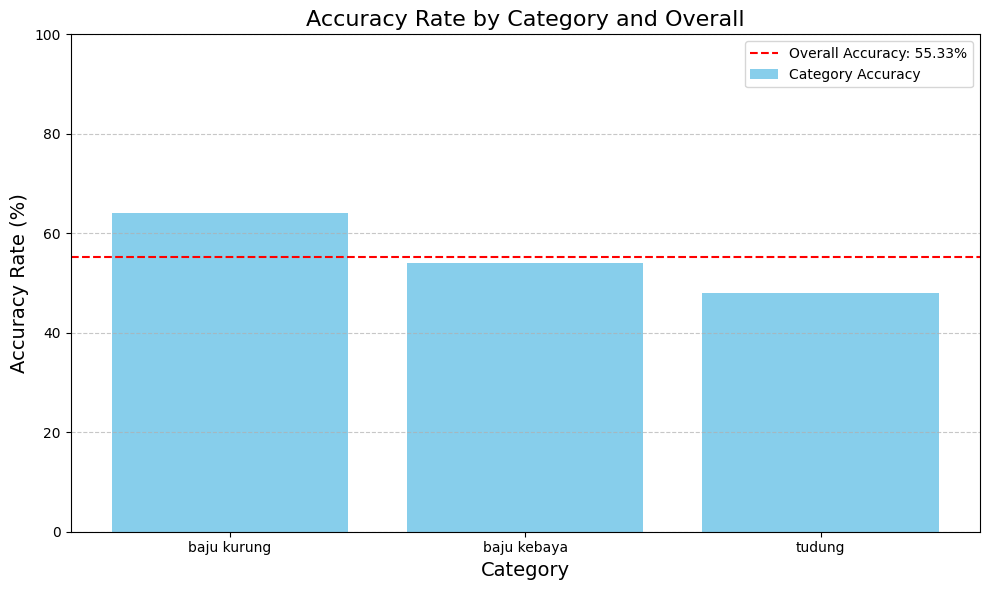

Category Accuracies: defaultdict(<class 'float'>, {'baju kurung': 64.0, 'baju kebaya': 54.0, 'tudung': 48.0})
Overall Accuracy: 55.333333333333336


In [133]:
# Plot the results as a bar graph
def plot_category_accuracies(category_accuracies, overall_accuracy):
    categories = list(category_accuracies.keys())
    accuracies = list(category_accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, accuracies, color='skyblue', label='Category Accuracy')
    plt.axhline(y=overall_accuracy, color='red', linestyle='--', label=f'Overall Accuracy: {overall_accuracy:.2f}%')
    plt.title("Accuracy Rate by Category and Overall", fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel("Accuracy Rate (%)", fontsize=14)
    plt.ylim(0, 100)
    plt.legend(loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Evaluate and Visualize
category_accuracies, overall_accuracy = evaluate_by_category_and_overall(categories, ground_truth_dict, neighbors, filenames, model, n=5)
plot_category_accuracies(category_accuracies, overall_accuracy)

print("Category Accuracies:", category_accuracies)
print("Overall Accuracy:", overall_accuracy)

In [134]:
distance,indices = neighbors.kneighbors([input_image])

In [135]:
indices[0]

array([  0,  18,  76, 174,  82,  98, 345,  43,  12,  92], dtype=int64)

In [136]:
from IPython.display import Image

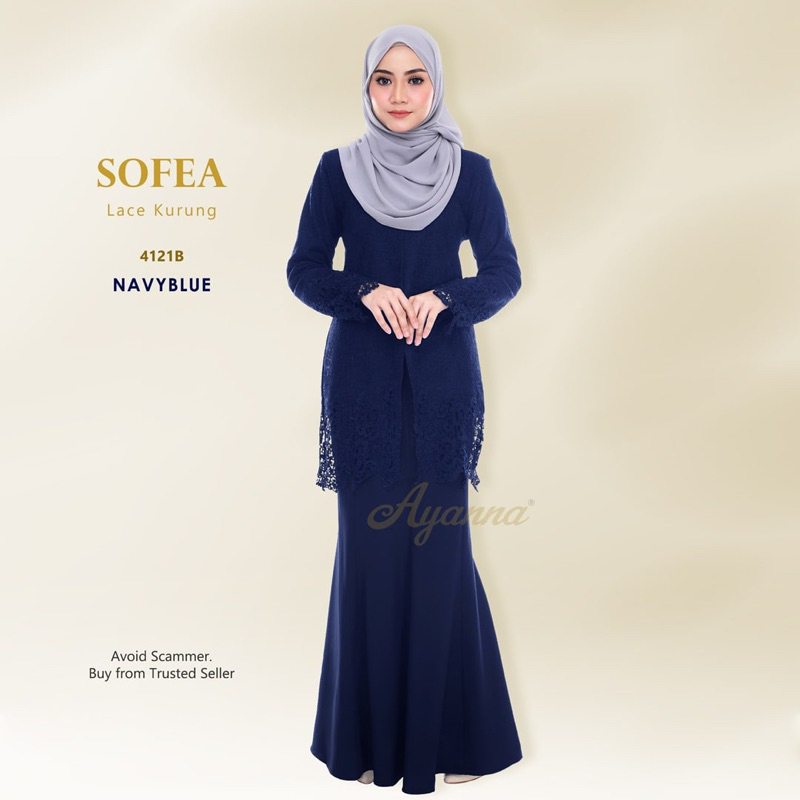

In [137]:
Image('birugelap1.jpeg')

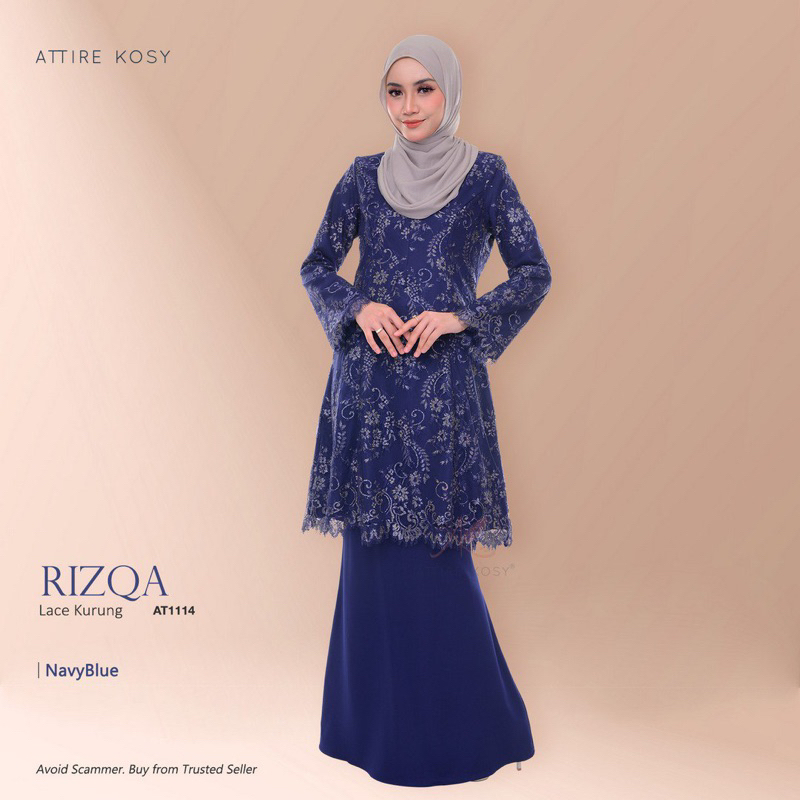

In [138]:
Image(filenames[indices[0][1]])

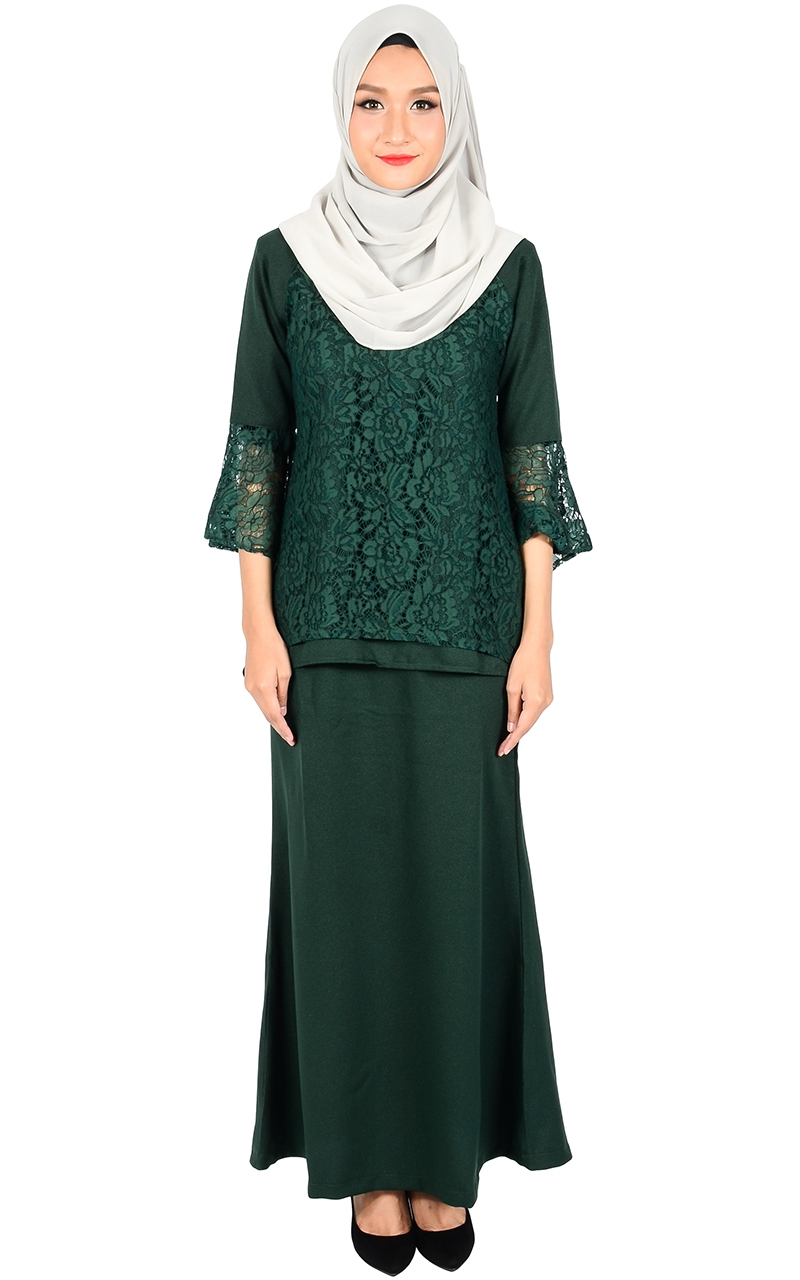

In [139]:
Image(filenames[indices[0][2]])

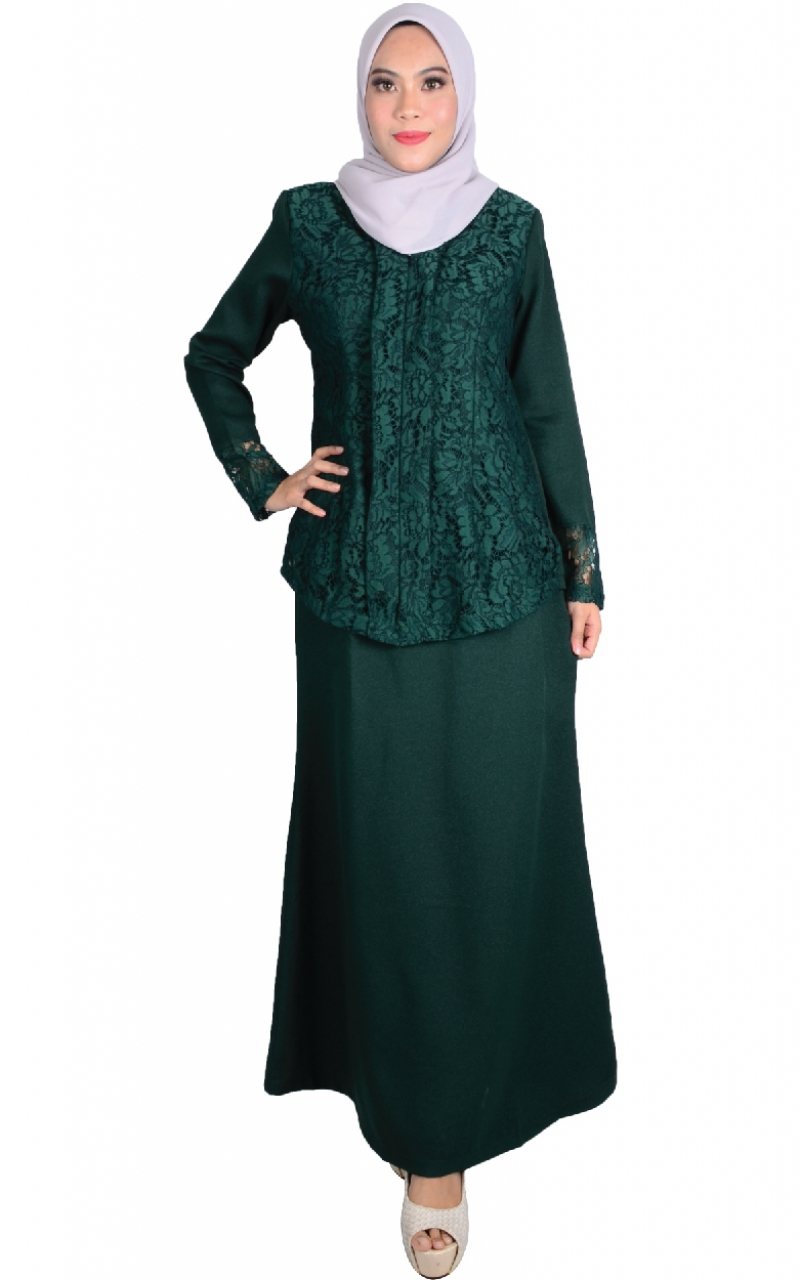

In [140]:
Image(filenames[indices[0][3]])

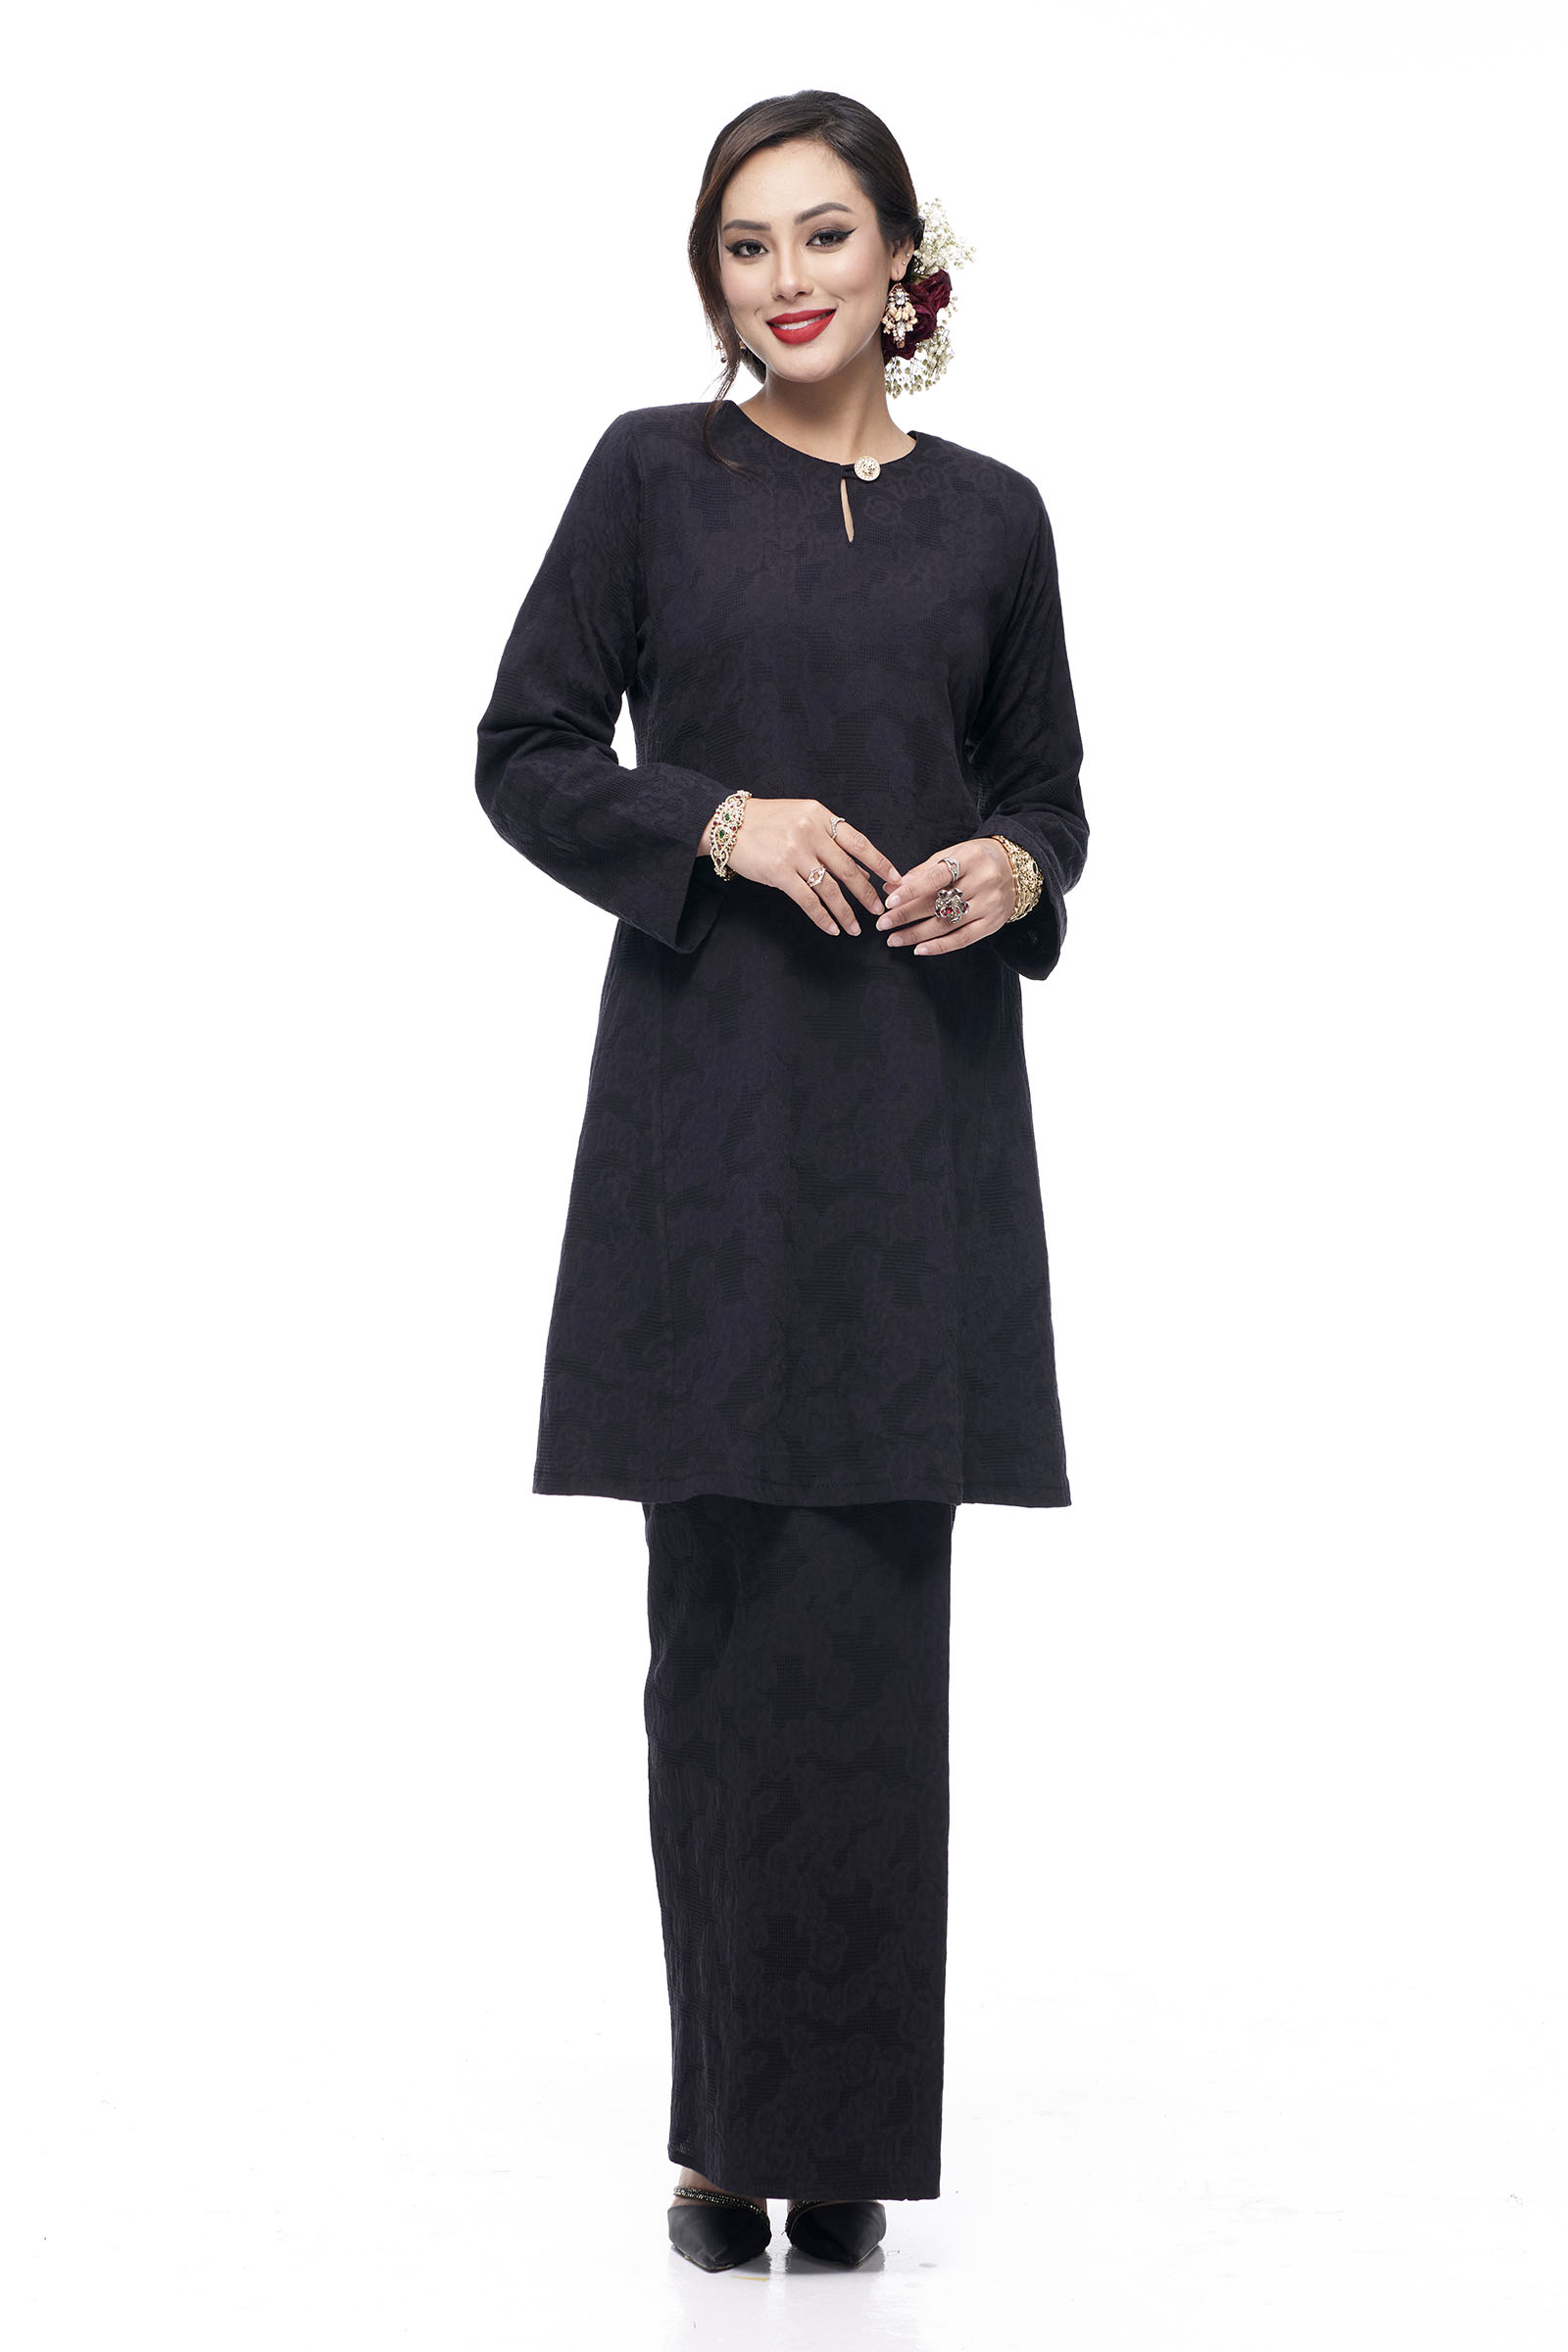

In [141]:
Image(filenames[indices[0][4]])

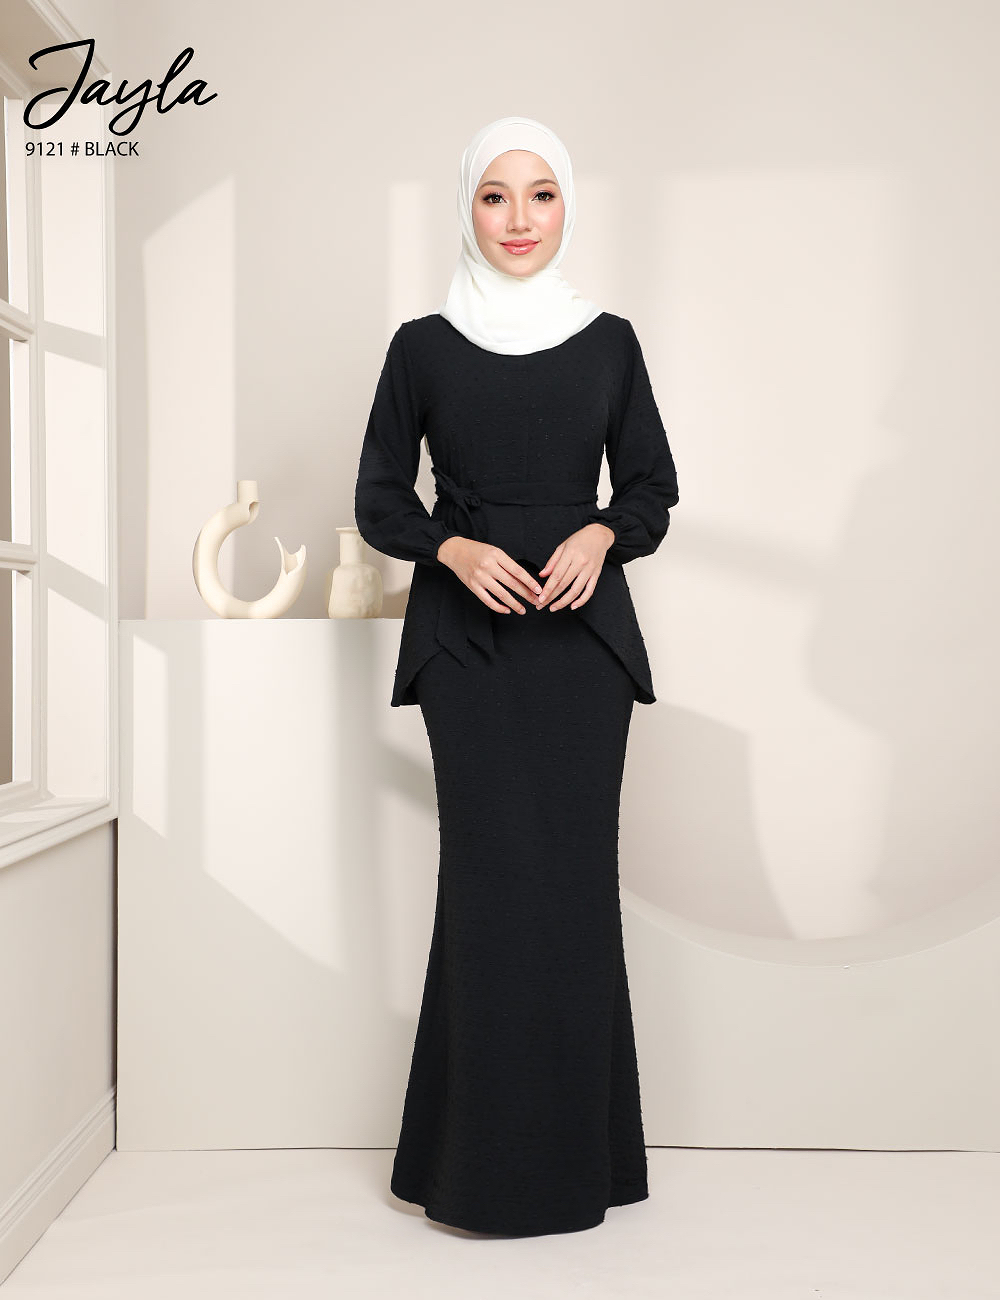

In [142]:
Image(filenames[indices[0][5]])

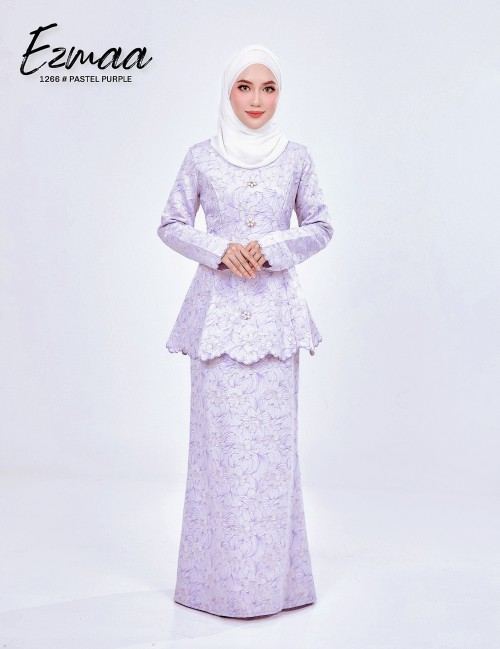

In [143]:
Image(filenames[indices[0][6]])

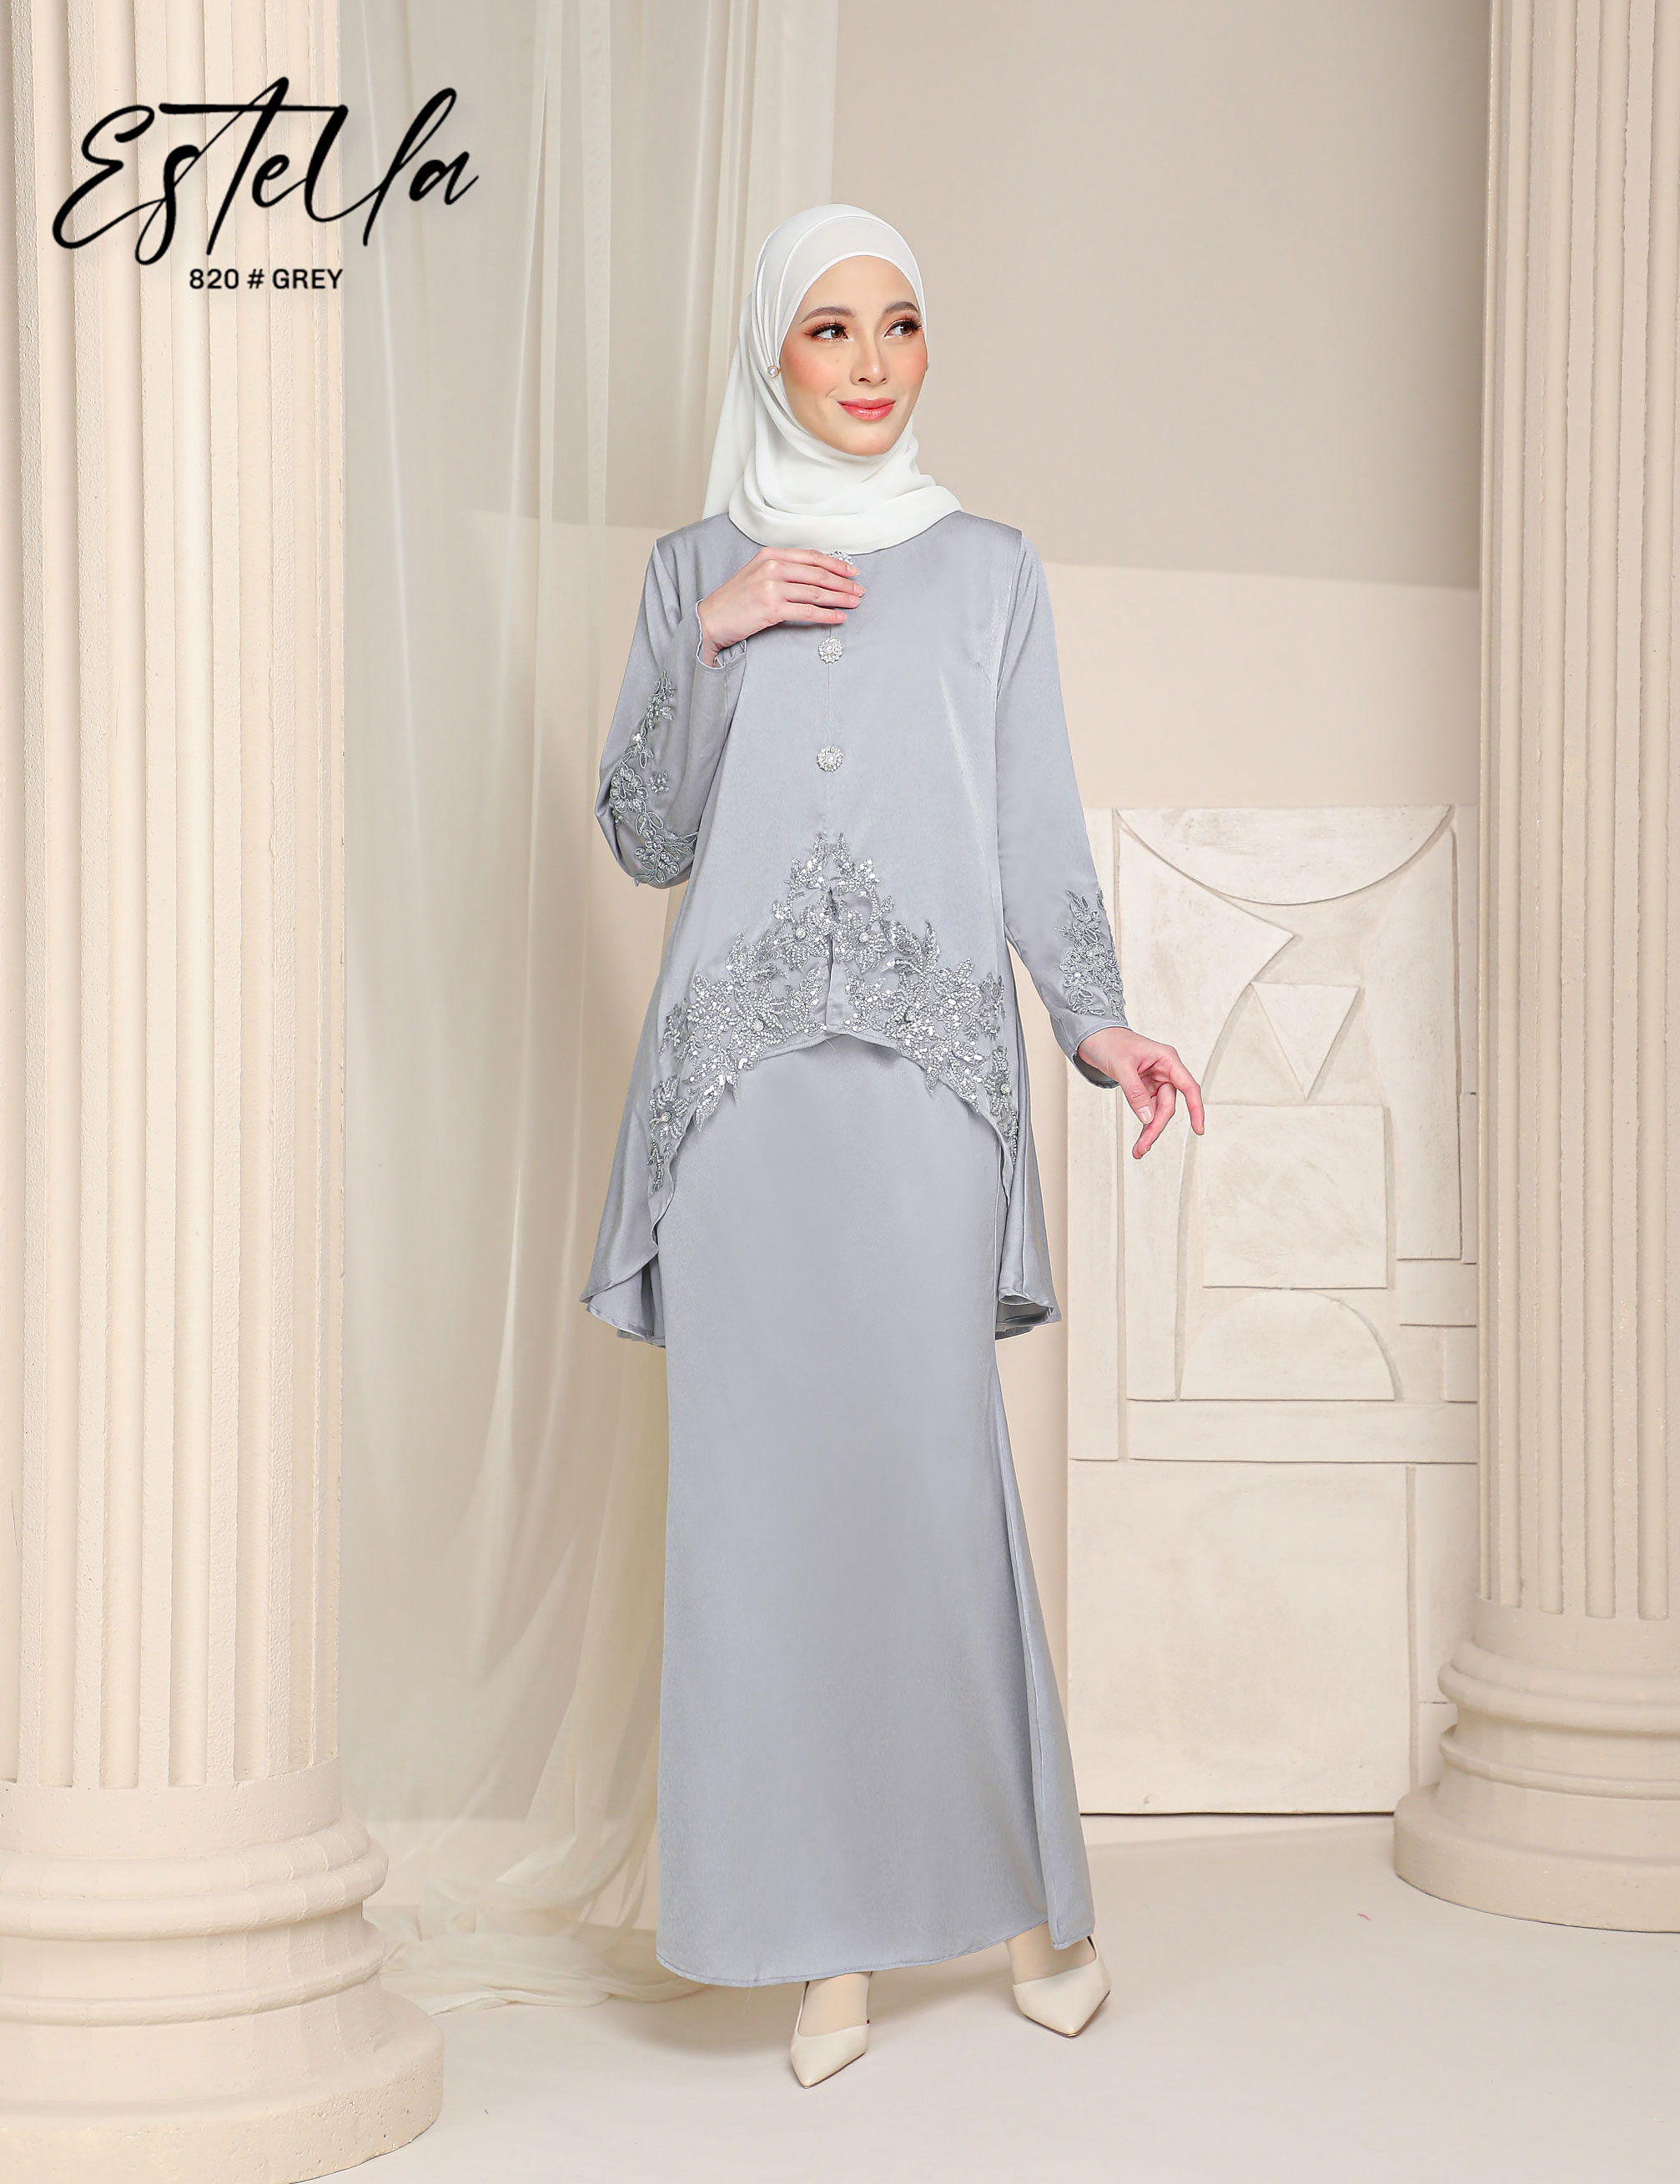

In [144]:
Image(filenames[indices[0][7]])

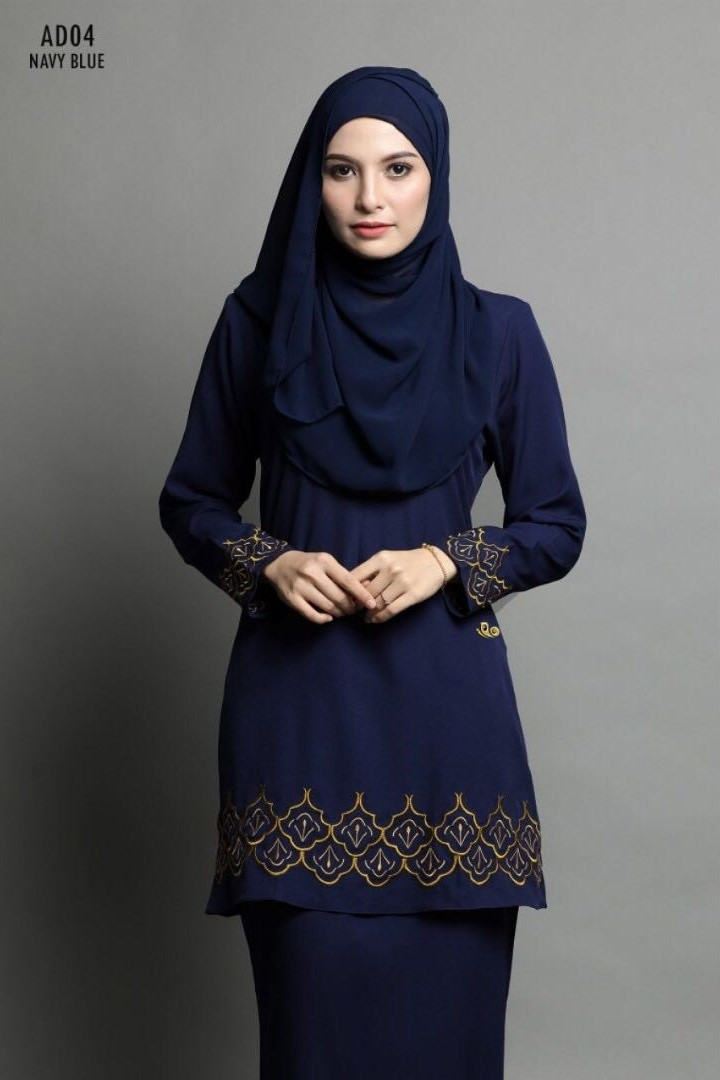

In [145]:
Image(filenames[indices[0][8]])

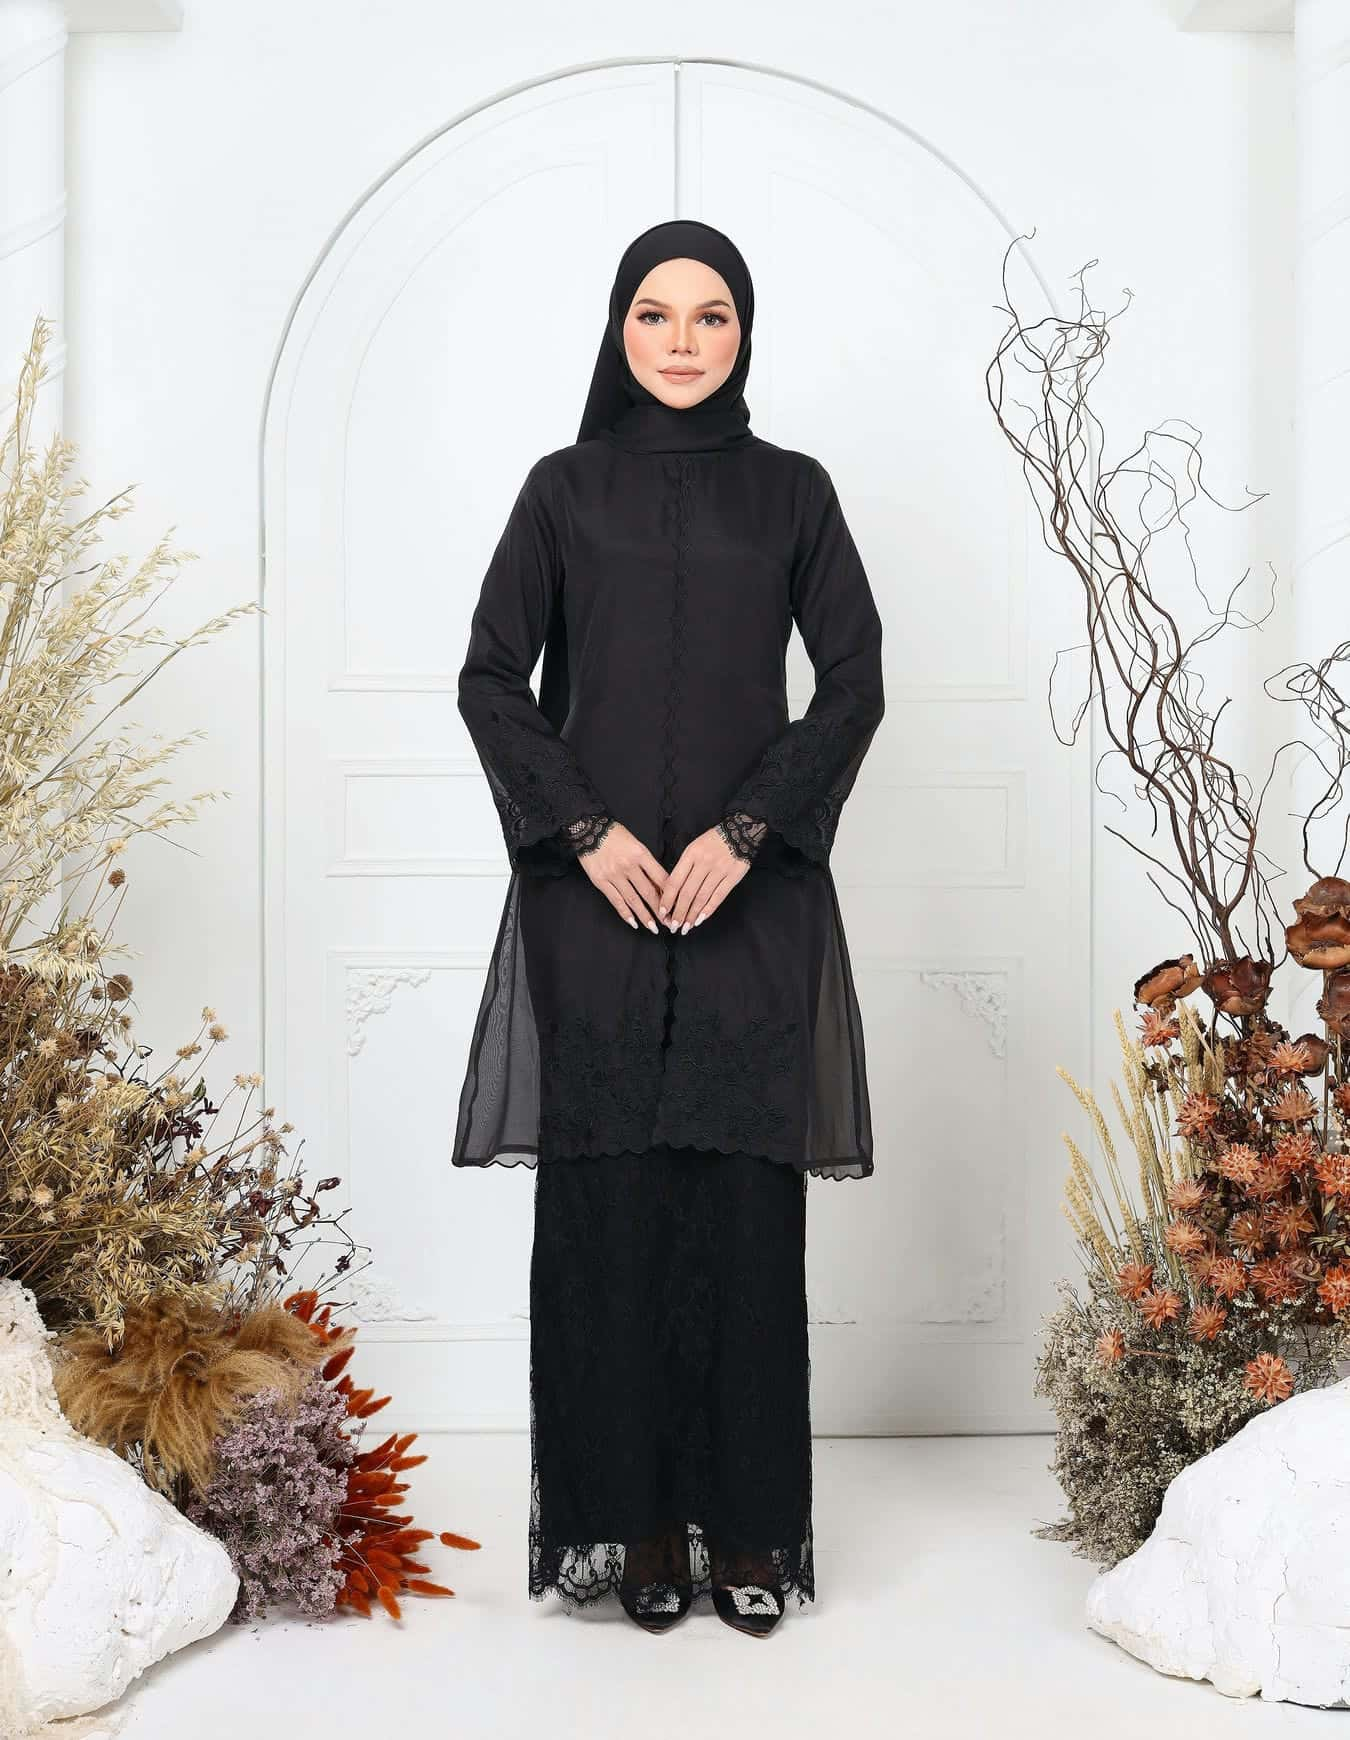

In [146]:
Image(filenames[indices[0][9]])